In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [2]:
df = pd.read_csv('Datasets/dengue_data.csv.gz')

In [3]:
df.columns

Index(['id', 'country_or_subregion', 'serotype', 'year',
       'in/out_of_subregions', 'epi_week', 'cumulative_dengue_cases',
       'incidence_rate', 'laboratory_confirmed', 'severe_dengue',
       '(sd/d)_x100_(e)', 'deaths', 'cfr', 'population_x_1000',
       'epi_week_start_date', 'dengue_cases_per_epi_week'],
      dtype='object')

In [4]:
df['year_month'] = pd.to_datetime(df.epi_week_start_date).dt.to_period('M')

## seeing what months in US for the years 2019 and 2020 had more cases

In [5]:
us_data = df[df.country_or_subregion.isin(['United States of America']) &
             df.year.isin([2019,2020])].groupby(
    ['year_month'])['dengue_cases_per_epi_week'].sum()

In [6]:
us_data.head().reset_index()

,year_month,dengue_cases_per_epi_week
0,2018-12,0.0
1,2019-01,11.0
2,2019-02,36.0
3,2019-03,31.0
4,2019-04,16.0


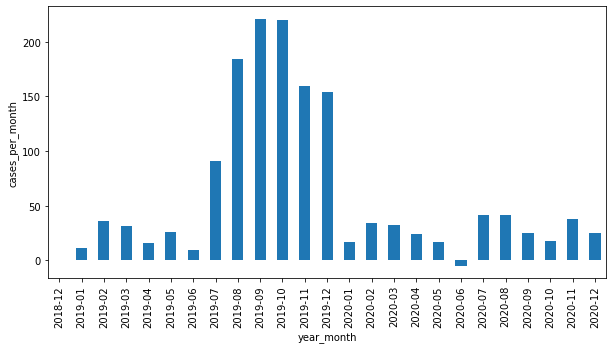

In [7]:
us_data.plot(kind='bar', xlabel='year_month', ylabel='cases_per_month')